# Predicting Malignancy of Breast Cancer

*Vladimir STEFAN, Maxime, Ana*

## For the project update

** Data was read from a csv file**

** Standardization gave us better accuracy than normalization, so we used that approach for our data.**

** We trained all the folloig classifiers:**
1. **Logistic Regression **
2. **SVM**
 - **Linear**
 - **Non-linear SVM**
3. **Random Forest**
4. **Neural Network**

** We performed 10 fold cross-validation on all of them** 

** We optimized the parameters of all of them**
- **Look at the parameters that we classied**


**We compared the accuracies of train and test data before and after optimization**
- **Look at the accuracies that we got**

**We ploted confision matrices, ROC and AUC**

**We got some problems**
- **Look at the questions after each of the classifiers below**

In [1]:
## Data Preprocessing

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import cross_val_score
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.neural_network import MLPClassifier

C:\Users\Vladimir\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Vladimir\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#from sklearn.preprocessing import normalize

dataset=np.genfromtxt('wdbc.csv', delimiter=',', converters ={0:lambda x: 1.0*int(x[0] == 77)})

x = dataset[:,1:]
y = dataset[:, 0]

In [3]:
#normalize(x) 
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size = .2, shuffle = False)

## Logistic Regression

**Questions:**
- **We get lower TRAIN accuracy for optimized parameters.**
- **We get same  TEST accuracy for optimized parameters.**

In [4]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
print('default log reg score on train ', lr.score(x_train, y_train))

default log reg score on train  0.984615384615


In [5]:
param_grid=[{'C':[0.001, 0.003, 0.01,0.03, 0.1, 0.3, 1], 'max_iter':[2,3,4,5,10,20,30]}]
lrgrid = GridSearchCV(lr, param_grid, cv=10, scoring='accuracy')
lrgrid.fit(x_train, y_train)
print('10-fold CV log reg score on train', lrgrid.best_score_)

10-fold CV log reg score on train 0.9802197802197802


In [6]:
print('best parameters are: ', lrgrid.best_params_)

best parameters are:  {'C': 0.1, 'max_iter': 4}


In [7]:
lrbest = LogisticRegression(C = 0.1, max_iter = 4)
lrbest.fit(x_train, y_train)
print('default log reg on test ', lr.score(x_test, y_test))
print('10-fold CV log reg score on test: ', lrbest.score(x_test, y_test))

default log reg on test  0.982456140351
10-fold CV log reg score on test:  0.982456140351


In [8]:
print('Confusion matrix for default: \n', metrics.confusion_matrix(y_test,lr.predict(x_test)))

Confusion matrix for default: 
 [[86  2]
 [ 0 26]]


In [9]:
print('Confusion matrix for optimized: \n', metrics.confusion_matrix(y_test,lrbest.predict(x_test)))

Confusion matrix for optimized: 
 [[86  2]
 [ 0 26]]


In [10]:
print(metrics.classification_report(y_test, lrbest.predict(x_test)))
confusion = metrics.confusion_matrix(y_test, lrbest.predict(x_test))
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('Classification Accuracy: ', (TP + TN) / float(TP + TN + FP + FN))
print('Classification error: ', (FP + FN) / float(TP + TN + FP + FN))
print('TP rate: ', TP / float(TP + FN))
print('FP rate: ', FP / float(TN + FP))
print('Precision: ', TP / float(TP + FP))

             precision    recall  f1-score   support

        0.0       1.00      0.98      0.99        88
        1.0       0.93      1.00      0.96        26

avg / total       0.98      0.98      0.98       114

Classification Accuracy:  0.982456140351
Classification error:  0.0175438596491
TP rate:  1.0
FP rate:  0.0227272727273
Precision:  0.928571428571


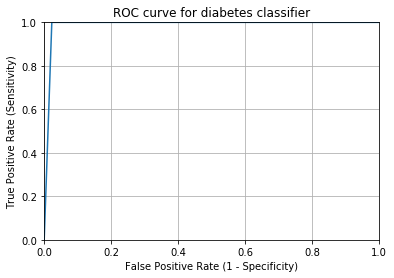

In [11]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, lrbest.predict(x_test))
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Breast Cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [12]:
print('AUC value: ', metrics.roc_auc_score(y_test, lrbest.predict(x_test)))

AUC value:  0.988636363636


## SVM

#### Linear SVM

**Questions:**
- **We get lower TRAIN accuracy for optimized parameters.**
- **We get same  TEST accuracy for optimized parameters.**

In [13]:
lin_svm = svm.LinearSVC()

In [14]:
lin_svm.fit(x_train, y_train)
print('default lin svm score on train ', lin_svm.score(x_train, y_train))

default lin svm score on train  0.984615384615


In [15]:
print('default parameters are: ', lin_svm.get_params())

default parameters are:  {'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


In [16]:
lin_svm_param_grid = [
  {'C': [1, 10, 100, 1000]}
 ]
lin_svmgrid = GridSearchCV(lin_svm, lin_svm_param_grid, cv=10, scoring='accuracy')
lin_svmgrid.fit(x_train, y_train)
print('10-fold CV lin svm score on train', lin_svmgrid.best_score_)

10-fold CV lin svm score on train 0.9560439560439561


In [17]:
print('best parameters are: ', lin_svmgrid.best_params_)

best parameters are:  {'C': 1}


In [18]:
lin_svmbest = svm.LinearSVC(C=1)

In [19]:
lin_svmbest.fit(x_train, y_train)
print('default lin svm on test ', lin_svm.score(x_test, y_test))
print('10-fold CV lin svm score on test: ', lin_svmbest.score(x_test, y_test))

default lin svm on test  0.964912280702
10-fold CV lin svm score on test:  0.964912280702


In [20]:
print('Confusion matrix for default: \n', metrics.confusion_matrix(y_test,lin_svm.predict(x_test)), "\n")
confusion = metrics.confusion_matrix(y_test, lin_svmbest.predict(x_test))
print('Confusion matrix for optimized: \n',confusion, '\n')
print(metrics.classification_report(y_test, lin_svmbest.predict(x_test)))
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('Classification Accuracy: ', (TP + TN) / float(TP + TN + FP + FN))
print('Classification error: ', (FP + FN) / float(TP + TN + FP + FN))
print('TP rate: ', TP / float(TP + FN))
print('FP rate: ', FP / float(TN + FP))
print('Precision: ', TP / float(TP + FP))

Confusion matrix for default: 
 [[85  3]
 [ 1 25]] 

Confusion matrix for optimized: 
 [[85  3]
 [ 1 25]] 

             precision    recall  f1-score   support

        0.0       0.99      0.97      0.98        88
        1.0       0.89      0.96      0.93        26

avg / total       0.97      0.96      0.97       114

Classification Accuracy:  0.964912280702
Classification error:  0.0350877192982
TP rate:  0.961538461538
FP rate:  0.0340909090909
Precision:  0.892857142857


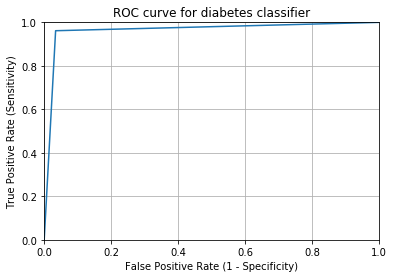

In [21]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, lin_svmbest.predict(x_test))
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Breast Cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [22]:
print('AUC value: ', metrics.roc_auc_score(y_test, lin_svmbest.predict(x_test)))

AUC value:  0.963723776224


#### SVM SVC

**Questions:** 
- **We get lower TRAIN and TEST accuracy for optimized parameters. **
- **What parameters other than C and kernel to optimize?**

In [23]:
nonlin_svm=svm.SVC()

In [24]:
nonlin_svm.fit(x_train, y_train)
print('default svm score on train ', nonlin_svm.score(x_train, y_train))

default svm score on train  0.984615384615


In [25]:
print('default parameters are: ', nonlin_svm.get_params())

default parameters are:  {'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [26]:
nonlin_svm_param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'kernel': ['rbf']},
 ]
nonlin_svmgrid = GridSearchCV(nonlin_svm, nonlin_svm_param_grid, cv=10, scoring='accuracy')
nonlin_svmgrid.fit(x_train, y_train)
print('10-fold CV svm score on train', nonlin_svmgrid.best_score_)

10-fold CV svm score on train 0.9758241758241758


In [27]:
print('best parameters are: ', nonlin_svmgrid.best_params_)

best parameters are:  {'C': 1, 'kernel': 'linear'}


In [28]:
nonlin_svmbest = svm.SVC(C = 1, kernel = 'linear')

In [29]:
nonlin_svmbest.fit(x_train, y_train)
print('default svm on test ', nonlin_svm.score(x_test, y_test))
print('10-fold CV svm score on test: ', nonlin_svmbest.score(x_test, y_test))

default svm on test  0.973684210526
10-fold CV svm score on test:  0.964912280702


In [32]:
print('Confusion matrix for default: \n', metrics.confusion_matrix(y_test,nonlin_svm.predict(x_test)), "\n")
confusion = metrics.confusion_matrix(y_test, nonlin_svmbest.predict(x_test))
print('Confusion matrix for optimised: \n', confusion, '\n')
print( metrics.classification_report(y_test, nonlin_svmbest.predict(x_test)))
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('Classification Accuracy: ', (TP + TN) / float(TP + TN + FP + FN))
print('Classification error: ', (FP + FN) / float(TP + TN + FP + FN))
print('TP rate: ', TP / float(TP + FN))
print('FP rate: ', FP / float(TN + FP))
print('Precision: ', TP / float(TP + FP))

Confusion matrix for default: 
 [[85  3]
 [ 0 26]] 

Confusion matrix for optimised: 
 [[85  3]
 [ 1 25]] 

             precision    recall  f1-score   support

        0.0       0.99      0.97      0.98        88
        1.0       0.89      0.96      0.93        26

avg / total       0.97      0.96      0.97       114

Classification Accuracy:  0.964912280702
Classification error:  0.0350877192982
TP rate:  0.961538461538
FP rate:  0.0340909090909
Precision:  0.892857142857


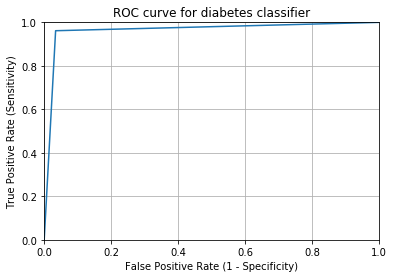

In [33]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, nonlin_svmbest.predict(x_test))
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Breast Cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [34]:
print('AUC value: ', metrics.roc_auc_score(y_test, lin_svmbest.predict(x_test)))

AUC value:  0.963723776224


## Random Forest

**Questions:**
- **We get lower TRAIN accuracy for optimized parameters.**
- **We get same TEST accuracy for optimized parameters.**

In [35]:
randfor=RandomForestClassifier()
randfor.fit(x_train, y_train)
print('default rand for on train ', randfor.score(x_train, y_train))

default rand for on train  0.993406593407


In [36]:
#print('default parameters are: ', randfor.get_params())

In [37]:
randfor_param_grid=[{'n_estimators':[10, 500, 1000], 'max_features': ['auto','log2', None], 'criterion': ['gini', 'entropy']}]
randforgrid = GridSearchCV(randfor, randfor_param_grid, cv=10, scoring='accuracy')
randforgrid.fit(x_train, y_train)
print('10-fold CV rand for score on train', randforgrid.best_score_)

10-fold CV rand for score on train 0.9604395604395605


In [38]:
print('best parameters are: ', randforgrid.best_params_)

best parameters are:  {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 10}


In [39]:
randforbest = RandomForestClassifier(criterion = 'entropy', max_features = 'auto', n_estimators = 500)

In [40]:
randforbest.fit(x_train, y_train)
print('default rand for on test ', randfor.score(x_test, y_test))
print('10-fold CV rand for score on test: ', randforbest.score(x_test, y_test))

default rand for on test  0.964912280702
10-fold CV rand for score on test:  0.982456140351


In [41]:
print('Confusion matrix for default: \n', metrics.confusion_matrix(y_test,randfor.predict(x_test)), "\n")
confusion = metrics.confusion_matrix(y_test, randforbest.predict(x_test))
print('Confusion matrix for optimized: \n', confusion, '\n')
print(metrics.classification_report(y_test, randforbest.predict(x_test)))
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('Classification Accuracy: ', (TP + TN) / float(TP + TN + FP + FN))
print('Classification error: ', (FP + FN) / float(TP + TN + FP + FN))
print('TP rate: ', TP / float(TP + FN))
print('FP rate: ', FP / float(TN + FP))
print('Precision: ', TP / float(TP + FP))

Confusion matrix for default: 
 [[85  3]
 [ 1 25]] 

Confusion matrix for optimized: 
 [[86  2]
 [ 0 26]] 

             precision    recall  f1-score   support

        0.0       1.00      0.98      0.99        88
        1.0       0.93      1.00      0.96        26

avg / total       0.98      0.98      0.98       114

Classification Accuracy:  0.982456140351
Classification error:  0.0175438596491
TP rate:  1.0
FP rate:  0.0227272727273
Precision:  0.928571428571


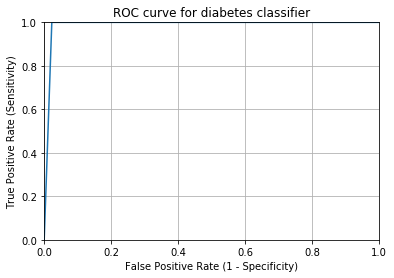

In [42]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, randforbest.predict(x_test))
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Breast Cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [43]:
print('AUC value: ', metrics.roc_auc_score(y_test, randforbest.predict(x_test)))

AUC value:  0.988636363636


## Neural Network

**Questions:**
- **Lot of pink errors**
- ** Did I use the correct function (MLPClassifier())? I used it because it is actually NeuralNetworks.MLPClassifier() in the documentation.**
- ** We get lower TRAIN accuracy for optimized parameters.**
- **We get same TEST accuracy for optimized parameters.**
- **TEST accuracy is EQUAL to the one of Random Forest. How likely is that?!**

In [44]:
nn=MLPClassifier()
nn.fit(x_train, y_train)
print('default nn on train ', nn.score(x_train, y_train))

default nn on train  0.993406593407


C:\Users\Vladimir\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [45]:
print('default parameters are: ', nn.get_params())

default parameters are:  {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 200, 'momentum': 0.9, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [46]:
nn_param_grid=[{'learning_rate' : ['constant', 'invscaling', 'adaptive'], 
                'momentum':[0.1,0.3,0.9], 
                'activation':['identity', 'logistic', 'tanh', 'relu']}]
nngrid = GridSearchCV(nn, nn_param_grid, cv=10, scoring='accuracy')
nngrid.fit(x_train, y_train)
print('10-fold CV nn score on train', nngrid.best_score_)

C:\Users\Vladimir\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Vladimir\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Vladimir\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Vladimir\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

10-fold CV nn score on train 0.978021978021978


In [47]:
print('best parameters are: ', nngrid.best_params_)

best parameters are:  {'activation': 'identity', 'learning_rate': 'constant', 'momentum': 0.3}


In [48]:
nnbest=MLPClassifier(activation = 'identity', learning_rate = 'constant', momentum = 0.9)

In [49]:
nnbest.fit(x_train, y_train)
print('default nn on test ', nn.score(x_test, y_test))
print('10-fold CV nn score on test: ', nnbest.score(x_test, y_test))

default nn on test  0.973684210526
10-fold CV nn score on test:  0.973684210526


In [50]:
print('Confusion matrix for default: \n', metrics.confusion_matrix(y_test, nn.predict(x_test)), "\n")
confusion = metrics.confusion_matrix(y_test, nnbest.predict(x_test))
print('Confusion matrix for optimized: \n', confusion, '\n')
print(metrics.classification_report(y_test, nnbest.predict(x_test)))
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('Classification Accuracy: ', (TP + TN) / float(TP + TN + FP + FN))
print('Classification error: ', (FP + FN) / float(TP + TN + FP + FN))
print('TP rate: ', TP / float(TP + FN))
print('FP rate: ', FP / float(TN + FP))
print('Precision: ', TP / float(TP + FP))

Confusion matrix for default: 
 [[85  3]
 [ 0 26]] 

Confusion matrix for optimized: 
 [[85  3]
 [ 0 26]] 

             precision    recall  f1-score   support

        0.0       1.00      0.97      0.98        88
        1.0       0.90      1.00      0.95        26

avg / total       0.98      0.97      0.97       114

Classification Accuracy:  0.973684210526
Classification error:  0.0263157894737
TP rate:  1.0
FP rate:  0.0340909090909
Precision:  0.896551724138


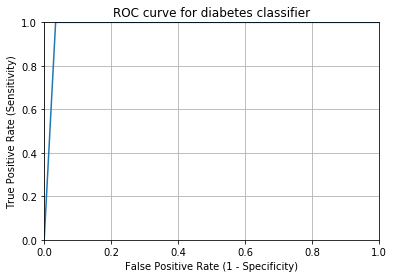

In [51]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, nnbest.predict(x_test))
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Breast Cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [52]:
print('AUC value: ', metrics.roc_auc_score(y_test, nnbest.predict(x_test)))

AUC value:  0.982954545455
